<a href="https://colab.research.google.com/github/Alankaar63/Python-Mini-Projects-Showcase/blob/main/bodeplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

In [2]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


Uncompensated system PM=inf degrees
Alpha:nan


<ipython-input-6-147550390285>:17: RuntimeWarning: invalid value encountered in sin
  alpha = (1+np.sin(phi_rad)/(1-np.sin(phi_rad)))


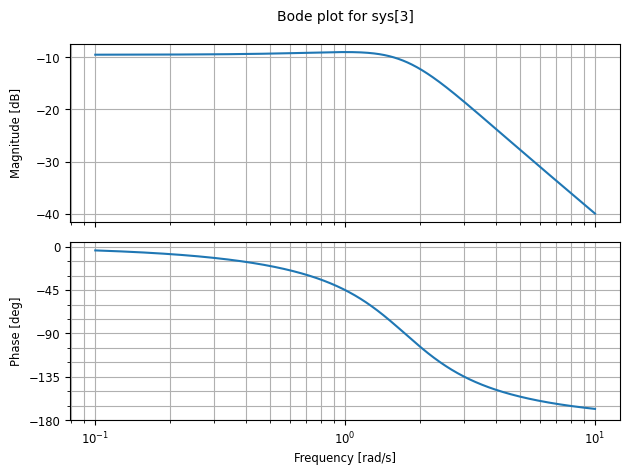

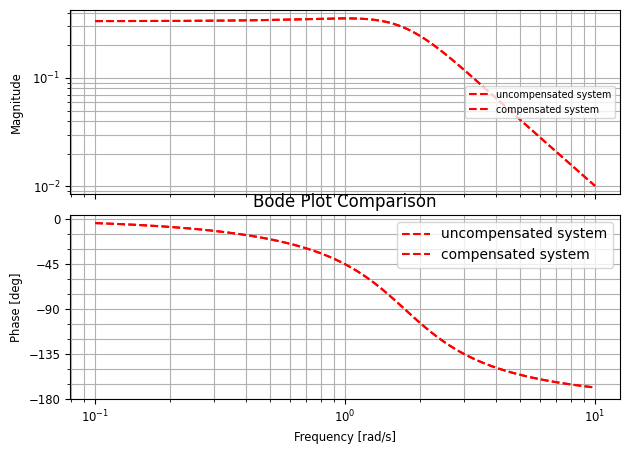

In [6]:
K = 1
num = [K]
denom = [1, 2, 3]

g = ctrl.tf(num,denom)

plt.figure()
mag,phase,omega = ctrl.bode(g,deg=True,dB=True,plot=True)

pm,gm,wp,wm = ctrl.margin(g)
print(f"Uncompensated system PM={pm:.2f} degrees")

desired_pm = 45
phi_m = desired_pm-pm+5
phi_rad = np.deg2rad(phi_m)

alpha = (1+np.sin(phi_rad)/(1-np.sin(phi_rad)))
print(f"Alpha:{alpha:.2f}")

wm = 6
p = wm*np.sqrt(alpha)
z = p/alpha

gc = ctrl.tf([1,z],[1,p])
gain = alpha
Gt = gain*gc*g

plt.figure()
ctrl.bode(g,omega=omega,label='uncompensated system',color='red',linestyle='--')
ctrl.bode(g,omega=omega,label='compensated system',color='red',linestyle='--')
plt.legend()
plt.title('Bode Plot Comparison')
plt.grid(True)
